# STRUCTURE:
## - Experiment settings
#### -- Initialise the models
#### -- Fit the AR model (re-run the model with 0 iterations)
#### -- Fit the non-AR model  (re-run the model with 0 iterations)
#### -- Save the models
## - Experiment results observation
#### --  Compare the models' performance
#### -- Plot the latent $\alpha$s
#### -- Plot the latent $\theta$s
#### -- Plot the latent $\phi$s
#### -- Visualise the init $\beta$s
#### -- Visualise the init $\theta$s
#### -- Perform the t-test
## - Initialisation
#### -- Set parameters
## - CORPUS SETTINGS
#### -- Experiment 4: The experiments for the paper (8 variations)

# EXPERIMENT SETTINGS

### Initialise the models

In [4]:
'''
Initialising the topic model
'''
from dtm_alpha import DTM_Alpha
var_init = 1
var_basic = 0.1
var_prop = 0.3
beta = 1./V
clf_ar = DTM_Alpha(K=K, beta=beta, sigma_0_sq=var_init, sigma_sq=var_basic, 
                delta_sq=var_prop, autoreg=True)
clf_nonar = DTM_Alpha(K=K, beta=beta, sigma_0_sq=var_init, sigma_sq=var_basic, 
                delta_sq=var_prop, autoreg=False)
'''
Defining the fitting parameters
'''
n_it = 5000
n_it_add = 0
n_burn_it = 1000
PATH_OUT_PLOTS = PATH_HOME + 'data/models/{}/plots/dataset-{}/it-{}/'.format(name_corpus, no_corpus, n_it + n_it_add)
PATH_OUT_MODEL = PATH_HOME + 'data/models/{}/prefit-models/'.format(name_corpus)
PATH_OUT_PERF = PATH_HOME + 'data/models/{}/performance/'.format(name_corpus) 
'''
Initialising the visualisation factory
'''
l_row = 62
l_column = 1.25
n_rows = 8
visualiser_corpus = Visualiser_Corpus(corpus_pp, vocab, n_rows, l_row, l_column, PATH_OUT_PLOTS, no_corpus, name_corpus)
'''
Initialising the experiment helper
'''
helper_experiment = Helper_Experiment()

### Fit the AR model

In [5]:
name_ar = 'corpus_{}_dataset-{}_it-{}_ar-{}.pkl'.format(name_corpus, no_corpus, n_it, str(True))
name_ar_loaded = 'corpus_{}_dataset-{}_it-{}_ar-{}.pkl'.format(name_corpus, no_corpus, n_it + n_it_add, str(True))
''' 
Fit
'''
# clf_ar.fit(corpus=corpus_pp, n_it=n_it, n_burn_it=n_burn_it)
'''
Load and fit
'''
clf_ar.load_fit(PATH_OUT_MODEL + name_ar, n_it_add=n_it_add)

DTM_Alpha has started.
DTM_Alpha has finished.


### Fit the non-AR model

In [6]:
name_nonar = 'corpus_{}_dataset-{}_it-{}_ar-{}.pkl'.format(name_corpus, no_corpus, n_it, str(False))
name_nonar_loaded = 'corpus_{}_dataset-{}_it-{}_ar-{}.pkl'.format(name_corpus, no_corpus, n_it + n_it_add, str(False))
'''
Fit
'''
# clf_nonar.fit(corpus=corpus_pp, n_it=n_it, n_burn_it=n_burn_it)
'''
Load and fit
'''
clf_nonar.load_fit(PATH_OUT_MODEL + name_nonar, n_it_add=n_it_add)

DTM_Alpha has started.
DTM_Alpha has finished.


# EXPERIMENT OBSERVATION

### Compare the models' performance

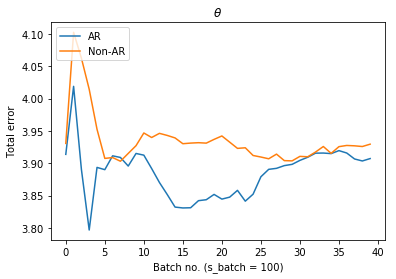

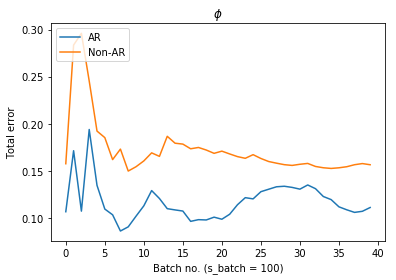

In [7]:
s_batch = 100
performance_ar = helper_experiment.calculate_performance(alpha_init=alpha_init, beta_init=beta_init,
                                                         theta_init=theta_init, clf=clf_ar, s_batch=s_batch)
performance_nonar = helper_experiment.calculate_performance(alpha_init=alpha_init, beta_init=beta_init, 
                                                            theta_init=theta_init, clf=clf_nonar, s_batch=s_batch)
import os
if not os.path.exists(PATH_OUT_PERF):
    os.makedirs(PATH_OUT_PERF)

name_ar_file = 'performance_dataset-{}_it-{}_ar-True.pkl'.format(no_corpus, n_it)
name_nonar_file = 'performance_dataset-{}_it-{}_ar-False.pkl'.format(no_corpus, n_it)

pkl.dump(performance_ar, open(PATH_OUT_PERF + name_ar_file, 'wb'))
pkl.dump(performance_nonar, open(PATH_OUT_PERF + name_nonar_file, 'wb'))

visualiser_corpus.compare_performances(performance_ar, performance_nonar, s_batch)

### Plot the latent $\theta$s

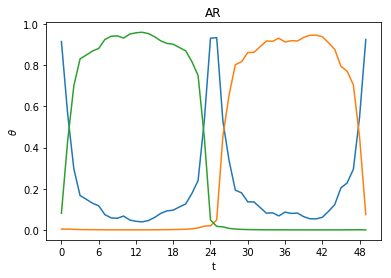

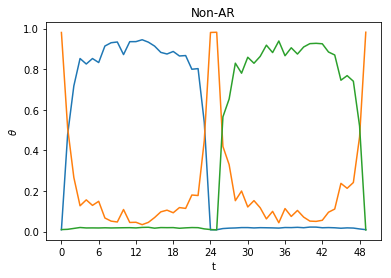

In [8]:
thetas_ar = np.array(clf_ar.hist_theta)
theta_ar_average = np.average(thetas_ar, axis=0)
visualiser_corpus.plot_latent_thetas(theta_ar_average, title='AR')

thetas_nonar = np.array(clf_nonar.hist_theta)
theta_nonar_average = np.average(thetas_nonar, axis=0)
visualiser_corpus.plot_latent_thetas(theta_nonar_average, title='Non-AR')

### Plot the latent $\phi$s

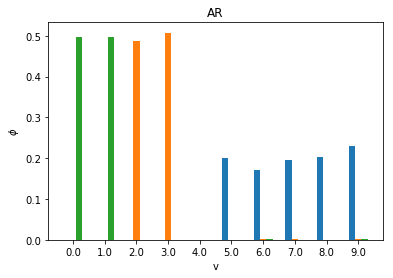

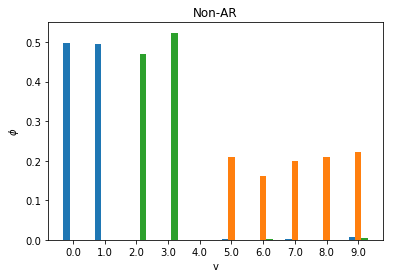

In [9]:
phis_ar = np.array(clf_ar.hist_phi)
phi_ar_average = np.average(phis_ar, axis=0)
visualiser_corpus.plot_latent_phis(phi_ar_average, title='AR')

phis_nonar = np.array(clf_nonar.hist_phi)
phi_nonar_average = np.average(phis_nonar, axis=0)
visualiser_corpus.plot_latent_phis(phi_nonar_average, title='Non-AR')

### Visualise the init $\phi$s

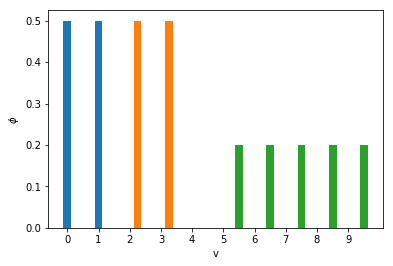

In [10]:
visualiser_corpus.plot_init_phi(beta_init, title='')

### Visualise the init $\theta$s

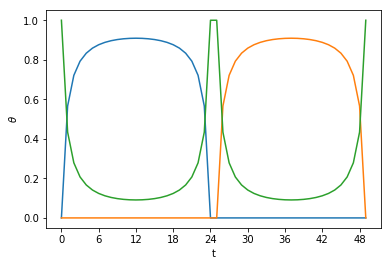

In [11]:
visualiser_corpus.plot_init_thetas(alphas=alpha_init, thetas=theta_init, title='')
# plt.savefig('alphas-init.png')

### Visualise the init $\alpha$s

In [12]:
visualiser_corpus.plot_init_alphas(alpha_init)
# plt.savefig('alphas-init.png')

No alphas used.


### Perform the t-test

In [13]:
no_experiment = '4'
slice_topic = "_topic-nonol"
slice_terms = "_terms-nonol"
slice_error = "_error-ol"
it_experiment = '5000'

type_corpus = 'exp-{}{}{}{}'.format(no_experiment, slice_topic, slice_terms, slice_error)
type_file = '*it-{}*'.format(it_experiment)

path_experiment = PATH_HOME + 'data/models/{}/performance/'.format(type_corpus)

import glob
ar_list = glob.glob(path_experiment + type_file + 'ar-True*')
ar_list = np.array(ar_list)
nonar_list = glob.glob(path_experiment + type_file + 'ar-False*')
nonar_list = np.array(nonar_list)

'''
Read the performance results
'''
thetas_ar = []
phis_ar = []
thetas_nonar = []
phis_nonar = []
for ar_model, nonar_model in zip(ar_list, nonar_list):     
    '''
    Read the phis.
    '''
    perf_ar = pd.read_pickle(ar_model)
    theta_ar, phi_ar = perf_ar
    theta_ar = theta_ar[-1]
    phi_ar = phi_ar[-1]
    thetas_ar.append(theta_ar)
    phis_ar.append(phi_ar)
#     print('Phi AR: {}'.format(phi_ar))
    '''
    Read the thetas.
    '''
    perf_nonar = pd.read_pickle(nonar_model)
    theta_nonar, phi_nonar = perf_nonar
    theta_nonar = theta_nonar[-1]
    phi_nonar = phi_nonar[-1]
    thetas_nonar.append(theta_nonar)
    phis_nonar.append(phi_nonar)
#     print('Phi Non-AR: {}'.format(phi_nonar))
    
'''
Perform the t-test
'''  
import scipy.stats as stats
print('Phi results:')
t_stat_rel_phi, p_val_rel_phi = stats.ttest_rel(phis_ar, phis_nonar)
print(t_stat_rel_phi)
print(p_val_rel_phi)
t_stat_rel_theta, p_val_rel_theta = stats.ttest_rel(thetas_ar, thetas_nonar)
print('Theta results:')
print(t_stat_rel_theta)
print(p_val_rel_theta)

Phi results:
3.93410789534
0.00343654789083
Theta results:
4.74548293801
0.00105082259339


# INITIALISATION

### Set the parameters

In [1]:
import os
import sys
import pandas as pd
import numpy as np
import pickle as pkl
np.set_printoptions(threshold=np.nan)
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

PATH_HOME = os.path.expanduser('~') + '/Projects/ssmsi/'
PATH_SRC_MODEL = PATH_HOME + 'code/models/'
PATH_SRC_AUXILIARY = PATH_HOME + 'code/pre-processing/'
PATH_DATA = PATH_HOME + 'data/corpora_processed/'
sys.path.append(PATH_SRC_MODEL)
sys.path.append(PATH_SRC_AUXILIARY)

V = 10
vocab = pd.read_pickle(PATH_DATA + 'vocab_synthetic.pkl')

from visualiser_corpus import Visualiser_Corpus
from processor_corpus import Processor_Corpus
from generator_corpus import Generator_Corpus
from helper_experiment import Helper_Experiment

# CORPUS SETTINGS

#### Experiment 4: The experiments for the paper

#### 4.1.1

In [2]:
name_corpus = 'exp-4'
name_corpus += "_topic-ol"
name_corpus += "_terms-nonol"
name_corpus += "_error-nonol"
K = 3
T = 50
xi = 100
size_instance = int(T/2)

alpha_init = np.zeros((T, K))
beta_init = np.zeros((K, V))
linspace_pi = np.linspace(0, np.pi, num=size_instance)

alpha_init[0:size_instance, 0] = np.sin(linspace_pi)
alpha_init[int(0.5*size_instance):int(1.5*size_instance), 1] = np.sin(linspace_pi)
alpha_init[:, 2] = np.linspace(10**-1, 10**-1, num=T)

theta_init = alpha_init / alpha_init.sum(1)[:, None]
alpha_init = None

beta_init[0, :] = [0.5, 0.5, 0, 0, 0, 0, 0, 0, 0, 0]
beta_init[1, :] = [0, 0, 0.5, 0.5, 0, 0, 0, 0, 0, 0]
beta_init[2, :] = [0, 0, 0, 0, 0, 0.2, 0.2, 0.2, 0.2, 0.2]

#### 4.1.2

In [79]:
name_corpus = 'exp-4'
name_corpus += "_topic-ol"
name_corpus += "_terms-nonol"
name_corpus += "_error-ol"
K = 3
T = 50
xi = 100
size_instance = int(T/2)

alpha_init = np.zeros((T, K))
beta_init = np.zeros((K, V))
linspace_pi = np.linspace(0, np.pi, num=size_instance)

alpha_init[0:size_instance, 0] = np.sin(linspace_pi)
alpha_init[int(0.5*size_instance):int(1.5*size_instance), 1] = np.sin(linspace_pi)
alpha_init[:, 2] = np.linspace(10**-1, 10**-1, num=T)

theta_init = alpha_init / alpha_init.sum(1)[:, None]
alpha_init = None

beta_init[0, :] = [0.5, 0.5, 0, 0, 0, 0, 0, 0, 0, 0]
beta_init[1, :] = [0, 0, 0.5, 0.5, 0, 0, 0, 0, 0, 0]
beta_init[2, :] = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]

#### 4.1.3

In [85]:
name_corpus = 'exp-4'
name_corpus += "_topic-ol"
name_corpus += "_terms-ol"
name_corpus += "_error-nonol"
K = 3
T = 50
xi = 100
size_instance = int(T/2)

alpha_init = np.zeros((T, K))
beta_init = np.zeros((K, V))
linspace_pi = np.linspace(0, np.pi, num=size_instance)

alpha_init[0:size_instance, 0] = np.sin(linspace_pi)
alpha_init[int(0.5*size_instance):int(1.5*size_instance), 1] = np.sin(linspace_pi)
alpha_init[:, 2] = np.linspace(10**-1, 10**-1, num=T)

theta_init = alpha_init / alpha_init.sum(1)[:, None]
alpha_init = None

beta_init[0, :] = [0.5, 0.5, 0, 0, 0, 0, 0, 0, 0, 0]
beta_init[1, :] = [0, 0.5, 0.5, 0, 0, 0, 0, 0, 0, 0]
beta_init[2, :] = [0, 0, 0, 0, 0, 0.2, 0.2, 0.2, 0.2, 0.2]

#### 4.1.4

In [85]:
name_corpus = 'exp-4'
name_corpus += "_topic-ol"
name_corpus += "_terms-ol"
name_corpus += "_error-ol"
K = 3
T = 50
xi = 100
size_instance = int(T/2)

alpha_init = np.zeros((T, K))
beta_init = np.zeros((K, V))
linspace_pi = np.linspace(0, np.pi, num=size_instance)

alpha_init[0:size_instance, 0] = np.sin(linspace_pi)
alpha_init[int(0.5*size_instance):int(1.5*size_instance), 1] = np.sin(linspace_pi)
alpha_init[:, 2] = np.linspace(10**-1, 10**-1, num=T)

theta_init = alpha_init / alpha_init.sum(1)[:, None]
alpha_init = None

beta_init[0, :] = [0.5, 0.5, 0, 0, 0, 0, 0, 0, 0, 0]
beta_init[1, :] = [0, 0.5, 0.5, 0, 0, 0, 0, 0, 0, 0]
beta_init[2, :] = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]

#### 4.2.1

In [2]:
name_corpus = 'exp-4'
name_corpus += "_topic-nonol"
name_corpus += "_terms-nonol"
name_corpus += "_error-nonol"
K = 3
T = 50
xi = 100
size_instance = int(T/2)

alpha_init = np.zeros((T, K))
beta_init = np.zeros((K, V))
linspace_pi = np.linspace(0, np.pi, num=size_instance)

alpha_init[0:size_instance, 0] = np.sin(linspace_pi)
alpha_init[size_instance:2*size_instance, 1] = np.sin(linspace_pi)
alpha_init[:, 2] = np.linspace(10**-1, 10**-1, num=T)

theta_init = alpha_init / alpha_init.sum(1)[:, None]
alpha_init = None

beta_init[0, :] = [0.5, 0.5, 0, 0, 0, 0, 0, 0, 0, 0]
beta_init[1, :] = [0, 0, 0.5, 0.5, 0, 0, 0, 0, 0, 0]
beta_init[2, :] = [0, 0, 0, 0, 0, 0.2, 0.2, 0.2, 0.2, 0.2]

#### 4.2.2

In [69]:
name_corpus = 'exp-4'
name_corpus += "_topic-nonol"
name_corpus += "_terms-nonol"
name_corpus += "_error-ol"
K = 3
T = 50
xi = 100
size_instance = int(T/2)

alpha_init = np.zeros((T, K))
beta_init = np.zeros((K, V))
linspace_pi = np.linspace(0, np.pi, num=size_instance)

alpha_init[0:size_instance, 0] = np.sin(linspace_pi)
alpha_init[size_instance:2*size_instance, 1] = np.sin(linspace_pi)
alpha_init[:, 2] = np.linspace(10**-1, 10**-1, num=T)

theta_init = alpha_init / alpha_init.sum(1)[:, None]
alpha_init = None

beta_init[0, :] = [0.5, 0.5, 0, 0, 0, 0, 0, 0, 0, 0]
beta_init[1, :] = [0, 0, 0.5, 0.5, 0, 0, 0, 0, 0, 0]
beta_init[2, :] = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]

#### 4.2.3

In [85]:
name_corpus = 'exp-4'
name_corpus += "_topic-nonol"
name_corpus += "_terms-ol"
name_corpus += "_error-nonol"
K = 3
T = 50
xi = 100
size_instance = int(T/2)

alpha_init = np.zeros((T, K))
beta_init = np.zeros((K, V))
linspace_pi = np.linspace(0, np.pi, num=size_instance)

alpha_init[0:size_instance, 0] = np.sin(linspace_pi)
alpha_init[size_instance:2*size_instance, 1] = np.sin(linspace_pi)
alpha_init[:, 2] = np.linspace(10**-1, 10**-1, num=T)

theta_init = alpha_init / alpha_init.sum(1)[:, None]
alpha_init = None

beta_init[0, :] = [0.5, 0.5, 0, 0, 0, 0, 0, 0, 0, 0]
beta_init[1, :] = [0, 0.5, 0.5, 0, 0, 0, 0, 0, 0, 0]
beta_init[2, :] = [0, 0, 0, 0, 0, 0.2, 0.2, 0.2, 0.2, 0.2]

#### 4.2.4

In [2]:
name_corpus = 'exp-4'
name_corpus += "_topic-nonol"
name_corpus += "_terms-ol"
name_corpus += "_error-ol"
K = 3
T = 50
xi = 100
size_instance = int(T/2)

alpha_init = np.zeros((T, K))
beta_init = np.zeros((K, V))
linspace_pi = np.linspace(0, np.pi, num=size_instance)

alpha_init[0:size_instance, 0] = np.sin(linspace_pi)
alpha_init[size_instance:2*size_instance, 1] = np.sin(linspace_pi)
alpha_init[:, 2] = np.linspace(10**-1, 10**-1, num=T)

theta_init = alpha_init / alpha_init.sum(1)[:, None]
alpha_init = None

beta_init[0, :] = [0.5, 0.5, 0, 0, 0, 0, 0, 0, 0, 0]
beta_init[1, :] = [0, 0.5, 0.5, 0, 0, 0, 0, 0, 0, 0]
beta_init[2, :] = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]

### Generate the corpus and initialise the helpers

In [3]:
no_corpus = 7
'''
Option 1: Load a corpus
'''
name_corpus_in = 'corpus_{}_dataset-{}_nparray.pkl'.format(name_corpus, no_corpus)
corpus_pp = pd.read_pickle(PATH_DATA + name_corpus_in)
'''
Option 2: Generate and pre-process a corpus
'''
# generator_corpus = Generator_Corpus(alpha_init=alpha_init, theta_init=theta_init, beta_init=beta_init, xi=xi, T=T)
# corpus = generator_corpus.generate_corpus()
# processor_corpus = Processor_Corpus(corpus=corpus, vocab=vocab)
# count_max = 50
# normalise = True
# corpus_pp = processor_corpus.process_corpus(threshold=count_max, normalise=normalise)

'\nOption 2: Generate and pre-process a corpus\n'